<a href="https://colab.research.google.com/github/taniajasmin/Machine-Learning-Basic-Projects/blob/main/Forest_Cover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip -q install xgboost

In [3]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [4]:
X, y = fetch_covtype(as_frame=True, return_X_y=True)
X.shape, y.value_counts().sort_index()

((581012, 54),
 Cover_Type
 1    211840
 2    283301
 3     35754
 4      2747
 5      9493
 6     17367
 7     20510
 Name: count, dtype: int64)

Numeric features are the first 10 columns; the rest are binary one-hots for Wilderness_Area & Soil_Type

In [5]:
num_cols = [c for c in X.columns if not (c.startswith("Wilderness_Area") or c.startswith("Soil_Type"))]
bin_cols = [c for c in X.columns if c not in num_cols]

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("bin", "passthrough", bin_cols),
    ],
    sparse_threshold=0.0,
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Random Forest

In [6]:
rf = Pipeline([
    ("prep", preprocess),
    ("clf", RandomForestClassifier(n_estimators=400, n_jobs=-1, random_state=42))
])

rf.fit(X_train, y_train)
pred = rf.predict(X_test)
print("RF accuracy:", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

RF accuracy: 0.9550872180580536
              precision    recall  f1-score   support

           1       0.97      0.94      0.95     42368
           2       0.95      0.97      0.96     56661
           3       0.94      0.96      0.95      7151
           4       0.92      0.84      0.88       549
           5       0.95      0.78      0.86      1899
           6       0.93      0.90      0.91      3473
           7       0.97      0.95      0.96      4102

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.96      0.95    116203



Confusion matrix

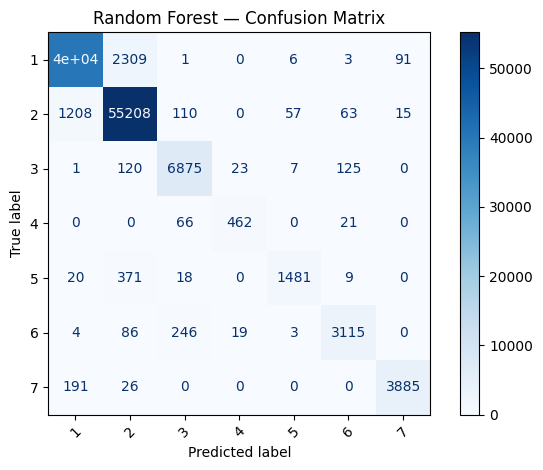

In [7]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap="Blues", xticks_rotation=45)
plt.title("Random Forest — Confusion Matrix"); plt.tight_layout(); plt.show()

Feature importance (top 15)

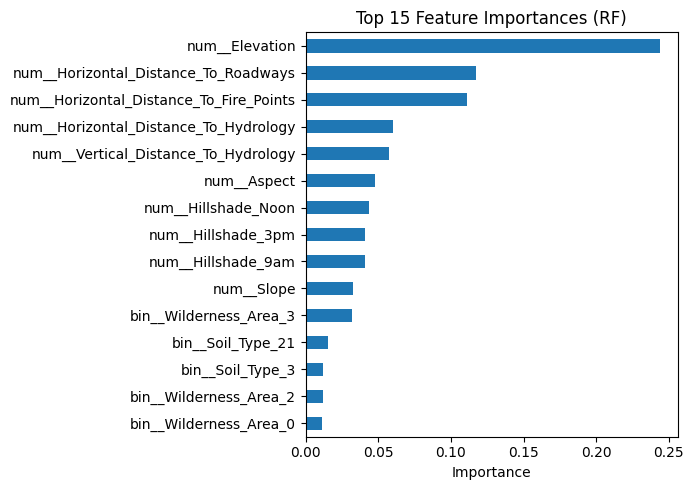

In [8]:
feat_names = rf.named_steps["prep"].get_feature_names_out()
importances = rf.named_steps["clf"].feature_importances_
imp = pd.Series(importances, index=feat_names).sort_values(ascending=False).head(15)

imp[::-1].plot(kind="barh", figsize=(7,5))
plt.title("Top 15 Feature Importances (RF)")
plt.xlabel("Importance"); plt.tight_layout(); plt.show()

In [9]:
rf = Pipeline([
    ("prep", preprocess),
    ("clf", RandomForestClassifier(n_estimators=400, n_jobs=-1, random_state=42)),
])

rf.fit(X_train, y_train)

pred = rf.predict(X_test)

print("RF accuracy:", accuracy_score(y_test, pred))
print()
print(classification_report(y_test, pred))

RF accuracy: 0.9550872180580536

              precision    recall  f1-score   support

           1       0.97      0.94      0.95     42368
           2       0.95      0.97      0.96     56661
           3       0.94      0.96      0.95      7151
           4       0.92      0.84      0.88       549
           5       0.95      0.78      0.86      1899
           6       0.93      0.90      0.91      3473
           7       0.97      0.95      0.96      4102

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.96      0.95    116203



Confusion matrix

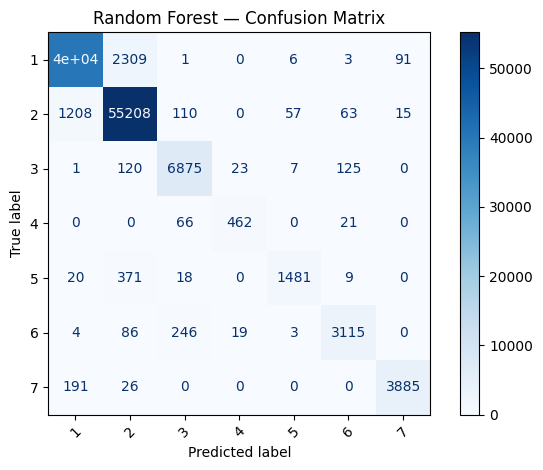

In [10]:
ConfusionMatrixDisplay.from_estimator(
    rf, X_test, y_test, cmap="Blues", xticks_rotation=45
)
plt.title("Random Forest — Confusion Matrix")
plt.tight_layout()
plt.show()

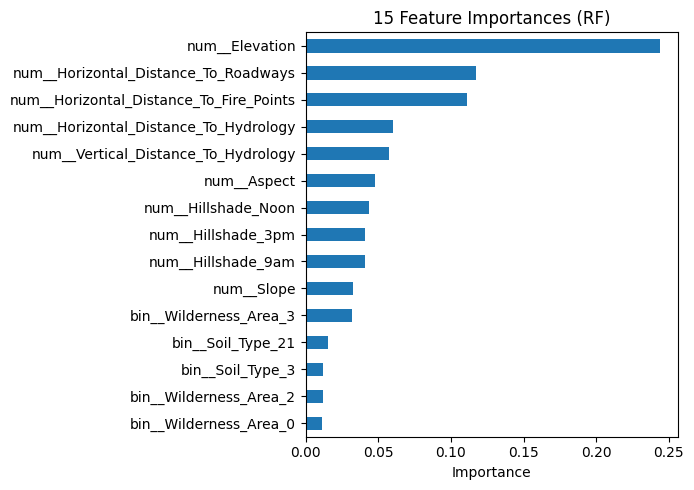

In [11]:
feat_names = rf.named_steps["prep"].get_feature_names_out()
importances = rf.named_steps["clf"].feature_importances_

imp = pd.Series(importances, index=feat_names).sort_values(ascending=False).head(15)

imp[::-1].plot(kind="barh", figsize=(7,5))
plt.title("15 Feature Importances (RF)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [12]:
!pip -q install xgboost

In [13]:
import pandas as pd, numpy as np
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# load + preprocess
X, y = fetch_covtype(as_frame=True, return_X_y=True)
num_cols = [c for c in X.columns if not (c.startswith("Wilderness_Area") or c.startswith("Soil_Type"))]
bin_cols = [c for c in X.columns if c not in num_cols]
preprocess = ColumnTransformer([("num", StandardScaler(), num_cols), ("bin", "passthrough", bin_cols)], sparse_threshold=0.0)

# same split for both
y0 = (y - 1).astype(int)
Xtr, Xte, ytr, yte = train_test_split(X, y0, test_size=0.2, random_state=42, stratify=y0)

# models
rf  = Pipeline([("prep", preprocess), ("clf", RandomForestClassifier(n_estimators=400, n_jobs=-1, random_state=42))])
xgb = Pipeline([("prep", preprocess), ("clf", XGBClassifier(
    n_estimators=500, max_depth=10, learning_rate=0.1, subsample=0.9, colsample_bytree=0.8,
    reg_lambda=1.0, objective="multi:softprob", tree_method="hist", eval_metric="mlogloss",
    random_state=42, n_jobs=-1))])

rf.fit(Xtr, ytr); xgb.fit(Xtr, ytr)
print("RF acc:", accuracy_score(yte, rf.predict(Xte)))
print("XGB acc:", accuracy_score(yte, xgb.predict(Xte)))


RF acc: 0.9550872180580536
XGB acc: 0.9649750867017203
